In [3]:
%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
import pylab

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols

from IPython.display import HTML
from IPython.display import display

# Set some Pandas options
pandas.set_option('display.notebook_repr_html', False)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 25)
pandas.set_option('display.precision', 4)



from decimal import *
getcontext().prec = 4
getcontext().rounding = 'ROUND_UP'
getcontext()

C:\ProgramData\Anaconda3\envs\my_root\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Context(prec=4, rounding=ROUND_UP, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [4]:
dm = pandas.read_csv('2010game_physical.csv')
dm.head()

   gamenumber awayTeam  awaySalary  awayAge  awayHeight  awayWeight  \
0       20001      MTL     38.3833      501        1313        3695   
1       20002      PHI     50.3650      498        1317        3669   
2       20003      CAR     35.8250      471        1315        3574   
3       20004      CHI     50.5600      462        1326        3700   
4       20005      CGY     39.7650      505        1331        3726   

        awayGoaliue  awayGoals homeTeam  homeSalary  homeAge  homeHeight  \
0       PRICE_CAREY          2      TOR     44.6130      471        1312   
1  BOBROVSKY_SERGEI          3      PIT     49.1924      497        1308   
2          WARD_CAM          4      MIN     40.1800      503        1321   
3       TURCO_MARTY          3      COL     33.7500      469        1306   
4  KIPRUSOFF_MIIKKA          0      EDM     41.4000      458        1324   

   homeWeight             homeGoalie  homeGoals winteamcode  
0        3715  GIGUERE_JEANSEBASTIEN          3       

# Question

Present the summary statistics

# Answer


In [5]:
dm.describe()

       gamenumber  awaySalary    awayAge  awayHeight  awayWeight  awayGoals  \
count   1230.0000   1230.0000  1230.0000   1230.0000   1230.0000  1230.0000   
mean   20615.5000     40.4077   491.9691   1314.3065   3672.8407     2.6163   
std      355.2147      8.7924    24.3731     19.0695     80.4384     1.5889   
min    20001.0000     14.9958   427.0000   1164.0000   3177.0000     0.0000   
25%    20308.2500     34.5466   474.0000   1310.0000   3636.0000     1.0000   
50%    20615.5000     40.4737   493.0000   1317.0000   3676.5000     3.0000   
75%    20922.7500     46.6455   505.7500   1323.0000   3725.0000     4.0000   
max    21230.0000     58.4830   571.0000   1343.0000   3827.0000    10.0000   

       homeSalary    homeAge  homeHeight  homeWeight  homeGoals  
count   1230.0000  1230.0000   1230.0000   1230.0000  1230.0000  
mean      40.7880   492.0789   1313.6528   3672.4041     2.8480  
std        8.8380    24.7560     20.3096     83.2905     1.7107  
min       15.7725   415.

# Question

What is the mean number of home and away team goals scored in a game?

# Answer


In [6]:
hg = round(dm['homeGoals'].mean(), 2)
ag = round(dm['awayGoals'].mean(), 2)
print('The mean number of home and away goals scored are ', hg, ' ', ag)

The mean number of home and away goals scored are  2.85   2.62


# Question

Present a histogram of home goals scored. Label the histogram.

# Answer


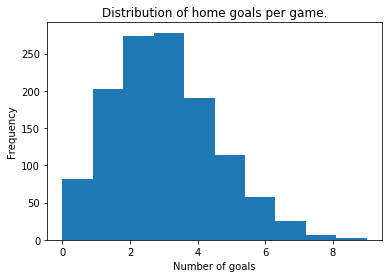

In [7]:
plt.hist(dm['homeGoals'])
plt.title('Distribution of home goals per game.')
plt.ylabel('Frequency')
plt.xlabel('Number of goals')
plt.show()

# Question

Present a scatter plot between home team goals and home team salary. Label the histogram. Describe the relationship

# Answer

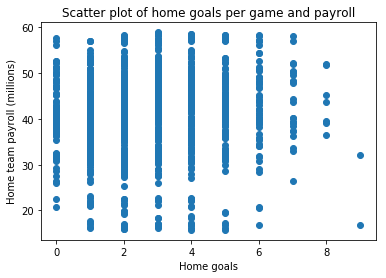

In [8]:
plt.scatter(dm['homeGoals'], dm['homeSalary'])
plt.title('Scatter plot of home goals per game and payroll')
plt.ylabel('Home team payroll (millions)')
plt.xlabel('Home goals')
plt.show()

# Question

Estimate the paramaters of the following model and interpret the results 

$hGoals_i = \beta_0 + \beta_1 hAge_i +  \beta_2 hHeight_i +  \beta_3 hWeight_i + mu_i$

# Answer


In [9]:
t1 = sm.OLS(dm['homeGoals'],sm.add_constant(dm[['homeAge', 'homeHeight', 'homeWeight']])).fit()
p1 = t1.params.map(lambda x: '%2.4f' % numpy.absolute(x))
t1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              homeGoals   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.655
Date:                Sun, 18 Mar 2018   Prob (F-statistic):              0.175
Time:                        16:01:08   Log-Likelihood:                -2402.7
No. Observations:                1230   AIC:                             4813.
Df Residuals:                    1226   BIC:                             4834.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6009      3.767     -0.425      0.671      -8.992       5.790
homeAge        0.0031      0.002      1.515      0.130      -0.001       0.007
homeHeight     0.0070      0.005      1.464      0.143      -0.002       0.016
homeWeight    -0.0017      0.001     -1.458      0.145      -0.004       0.001
==============================================================================
Omnibus:                       44.556   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.840
Skew:                           0.488   Prob(JB):                     2.48e-11
Kurtosis:                       3.008   Cond. No.                     3.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The paramater estimates represent unit change increments. 

* Each year increase in the home team's age will result in an increase of {{p1[1]}} home goals per game.
* Each inch increase in the home team's height will result in an increase of {{p1[2]}} home goals per game.
* Each pound increase in the home team's weight will result in a decrease of {{p1[3]}} home goals per game.



# Question

Estimate the paramaters of the following model and interpret the results 

$dGoals_i = \beta_0 + \beta_1 lnDSalary_i + \beta_2 lnDAge_i +  \beta_3 lnDHeight_i +  \beta_4 lnDWeight_i + mu_i$

# Answer

In [16]:
dm['dGoals']    = dm['homeGoals'] - dm['awayGoals'] 
dm['lnDAge']    = numpy.log(dm['homeAge']/dm['awayAge'])
dm['lnDHeight'] = numpy.log(dm['homeHeight']/dm['awayHeight'])
dm['lnDWeight'] = numpy.log(dm['homeWeight']/dm['awayWeight'])
dm['lnDSalary']  = numpy.log(dm['homeSalary']/dm['awaySalary'])

t2 = sm.OLS(dm['dGoals'],sm.add_constant(dm[['lnDSalary', 'lnDAge', 'lnDHeight', 'lnDWeight']])).fit()
p2 = t2.params.map(lambda x: '%2.1f' % numpy.absolute(x))
t2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 dGoals   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.133
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.79e-06
Time:                        16:08:44   Log-Likelihood:                -2809.6
No. Observations:                1230   AIC:                             5629.
Df Residuals:                    1225   BIC:                             5655.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2258      0.068      3.322      0.001       0.092       0.359
lnDSalary      1.0603      0.228      4.650      0.000       0.613       1.508
lnDAge        -0.7155      1.170     -0.611      0.541      -3.012       1.581
lnDHeight      9.5704      6.205      1.542      0.123      -2.602      21.743
lnDWeight     -7.5867      4.236     -1.791      0.074     -15.897       0.723
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.222
Skew:                           0.025   Prob(JB):                        0.895
Kurtosis:                       3.043   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The paramater estimates represent the impact of a one percent changes a percentage change in home goals per game:

In [19]:
print ('payroll: ', p2[1]) 
print ('age: ', p2[2])
print ('home team height: ', p2[3])
print ('home teams weight: ', p2[4])

payroll:  1.1
age:  0.7
home team height:  9.6
home teams weight:  7.6
